## 181. 실습 : KMeans Clustering을 이용한 Customer Segmentation

고객 세분화(Customer segmentation)는 고객 기반을 유사한 특성을 가진 개인의 그룹으로 분할하는 관행입니다. 예를 들어 한 그룹에는 높은 수익을 올리고 위험이 적은, 즉 제품을 구매하거나 서비스에 가입할 가능성이 큰 고객이 있을 수 있습니다. 또 다른 그룹에는 수익이 나지 않는 고객 등이 포함될 수 있습니다.

### Downloading Data

'customer_segmentation.csv' https://ibm.box.com/shared/static/rdf2wtk4ozh21p2j2xpenrg4bb0lkgjr.csv

In [30]:
customers_df = pd.read_csv('data/Cust_Segmentation.csv')
customers_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

**Address**는 범주형 변수(categorical variable) 입니다. 이산 변수(discrete variable)는 유클리드 거리 계산을 할 수 없으므로 이 feature 를 삭제하고 클러스터링을 실행합니다.

In [31]:
df = customers_df.drop(['Customer Id','Address'], axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [32]:
df.shape

(850, 8)

In [33]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [34]:
df.dropna(inplace=True)
df.shape

(700, 8)

In [35]:
X = df.values
X.shape

(700, 8)

**StandardScaler()** 를 사용하여 dataset 을 정규화 합니다.

In [36]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [37]:
X.shape

(700, 8)

In [38]:
num_clusters = 3

k_means = KMeans(n_clusters = num_clusters)
k_means.fit(X)
labels = k_means.labels_

set(labels)

{0, 1, 2}

### Insights

dataset 의 각 행은 고객을 나타내므로 각 행에는 레이블이 assign 됩니다.

In [39]:
df["Labels"] = labels
df.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


각 군집의 특징을 평균화하여 중심 값을 쉽게 확인할 수 있습니다.

In [40]:
df.groupby('Labels').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,
0,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
1,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884
2,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025


### 연령과 소득에 따른 고객 분포를 살펴 봅니다.

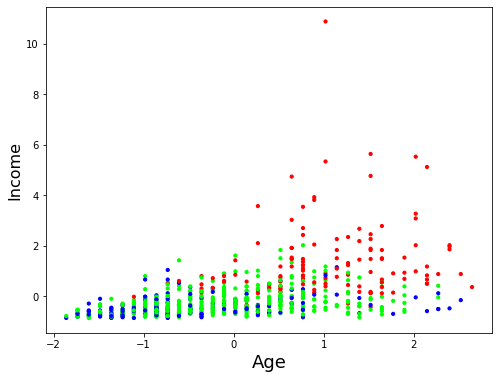

In [41]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], s=10, c=colors(labels))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

### 교육, 연령,  소득에 따른 고객 분포를 3차원 시각화로 살펴 봅니다.

<IPython.core.display.Javascript object>


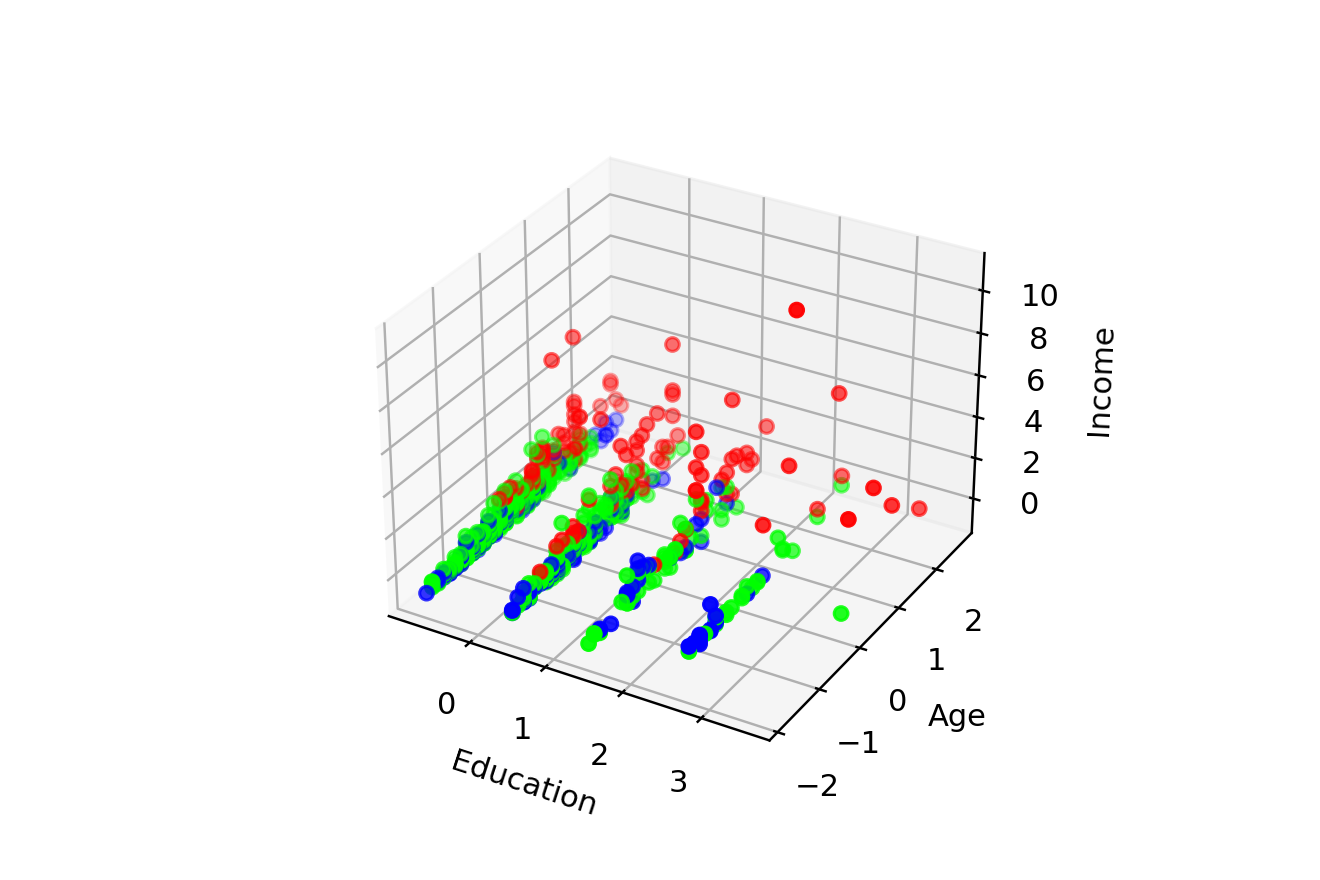

Text(0.5, 0, 'Income')

In [45]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=colors(labels))

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

k-means는 고객을 상호 배타적인 그룹 (예 : 3 개의 클러스터)으로 분할합니다. 각 클러스터의 고객은 인구 통계학적으로 유사합니다.
이제 각 클러스터의 공통적인 특성을 고려하여 각 그룹에 대한 프로필을 만들 수 있습니다.

-소득이 높고 교육받은 고령자  
-중년 및 중년 소득  
-젊고 낮은 소득